In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import shapiro

In [18]:
df=pd.read_csv("winequalityN.csv")
data=pd.read_csv("winequalityN.csv")
df.head(15)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   white            7.0              0.27         0.36           20.70   
1   white            6.3              0.30         0.34            1.60   
2   white            8.1              0.28         0.40            6.90   
3   white            7.2              0.23         0.32            8.50   
4   white            7.2              0.23         0.32            8.50   
5   white            8.1              0.28         0.40            6.90   
6   white            6.2              0.32         0.16            7.00   
7   white            7.0              0.27         0.36           20.70   
8   white            6.3              0.30         0.34            1.60   
9   white            8.1              0.22         0.43            1.50   
10  white            8.1              0.27         0.41            1.45   
11  white            8.6              0.23         0.40            4.20   
12  white            7.9              0.18         0.37            1.20   
13  white            6.6              0.16         0.40            1.50   
14  white            8.3              0.42         0.62           19.25   

    chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0       0.045                 45.0                 170.0   1.0010  3.00   
1       0.049                 14.0                 132.0   0.9940  3.30   
2       0.050                 30.0                  97.0   0.9951  3.26   
3       0.058                 47.0                 186.0   0.9956  3.19   
4       0.058                 47.0                 186.0   0.9956  3.19   
5       0.050                 30.0                  97.0   0.9951  3.26   
6       0.045                 30.0                 136.0   0.9949  3.18   
7       0.045                 45.0                 170.0   1.0010  3.00   
8       0.049                 14.0                 132.0   0.9940  3.30   
9       0.044                 28.0                 129.0   0.9938  3.22   
10      0.033                 11.0                  63.0   0.9908  2.99   
11      0.035                 17.0                 109.0   0.9947  3.14   
12      0.040                 16.0                  75.0   0.9920  3.18   
13      0.044                 48.0                 143.0   0.9912  3.54   
14      0.040                 41.0                 172.0   1.0002  2.98   

    sulphates  alcohol  quality  
0        0.45      8.8        6  
1        0.49      9.5        6  
2        0.44     10.1        6  
3        0.40      9.9        6  
4        0.40      9.9        6  
5        0.44     10.1        6  
6        0.47      9.6        6  
7        0.45      8.8        6  
8        0.49      9.5        6  
9        0.45     11.0        6  
10       0.56     12.0        5  
11       0.53      9.7        5  
12       0.63     10.8        5  
13       0.52     12.4        7  
14       0.67      9.7        5

In [19]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


(6497, 13)

In [20]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [22]:
#Before dealing with outliers, we will deal with missing values
df_wo_miss=df
#Checking if missing values are present
missing_vals=df.isnull().sum()
missing_vals.sort_values(inplace=True)
missing_vals

type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
residual sugar           2
chlorides                2
citric acid              3
sulphates                4
volatile acidity         8
pH                       9
fixed acidity           10
dtype: int64

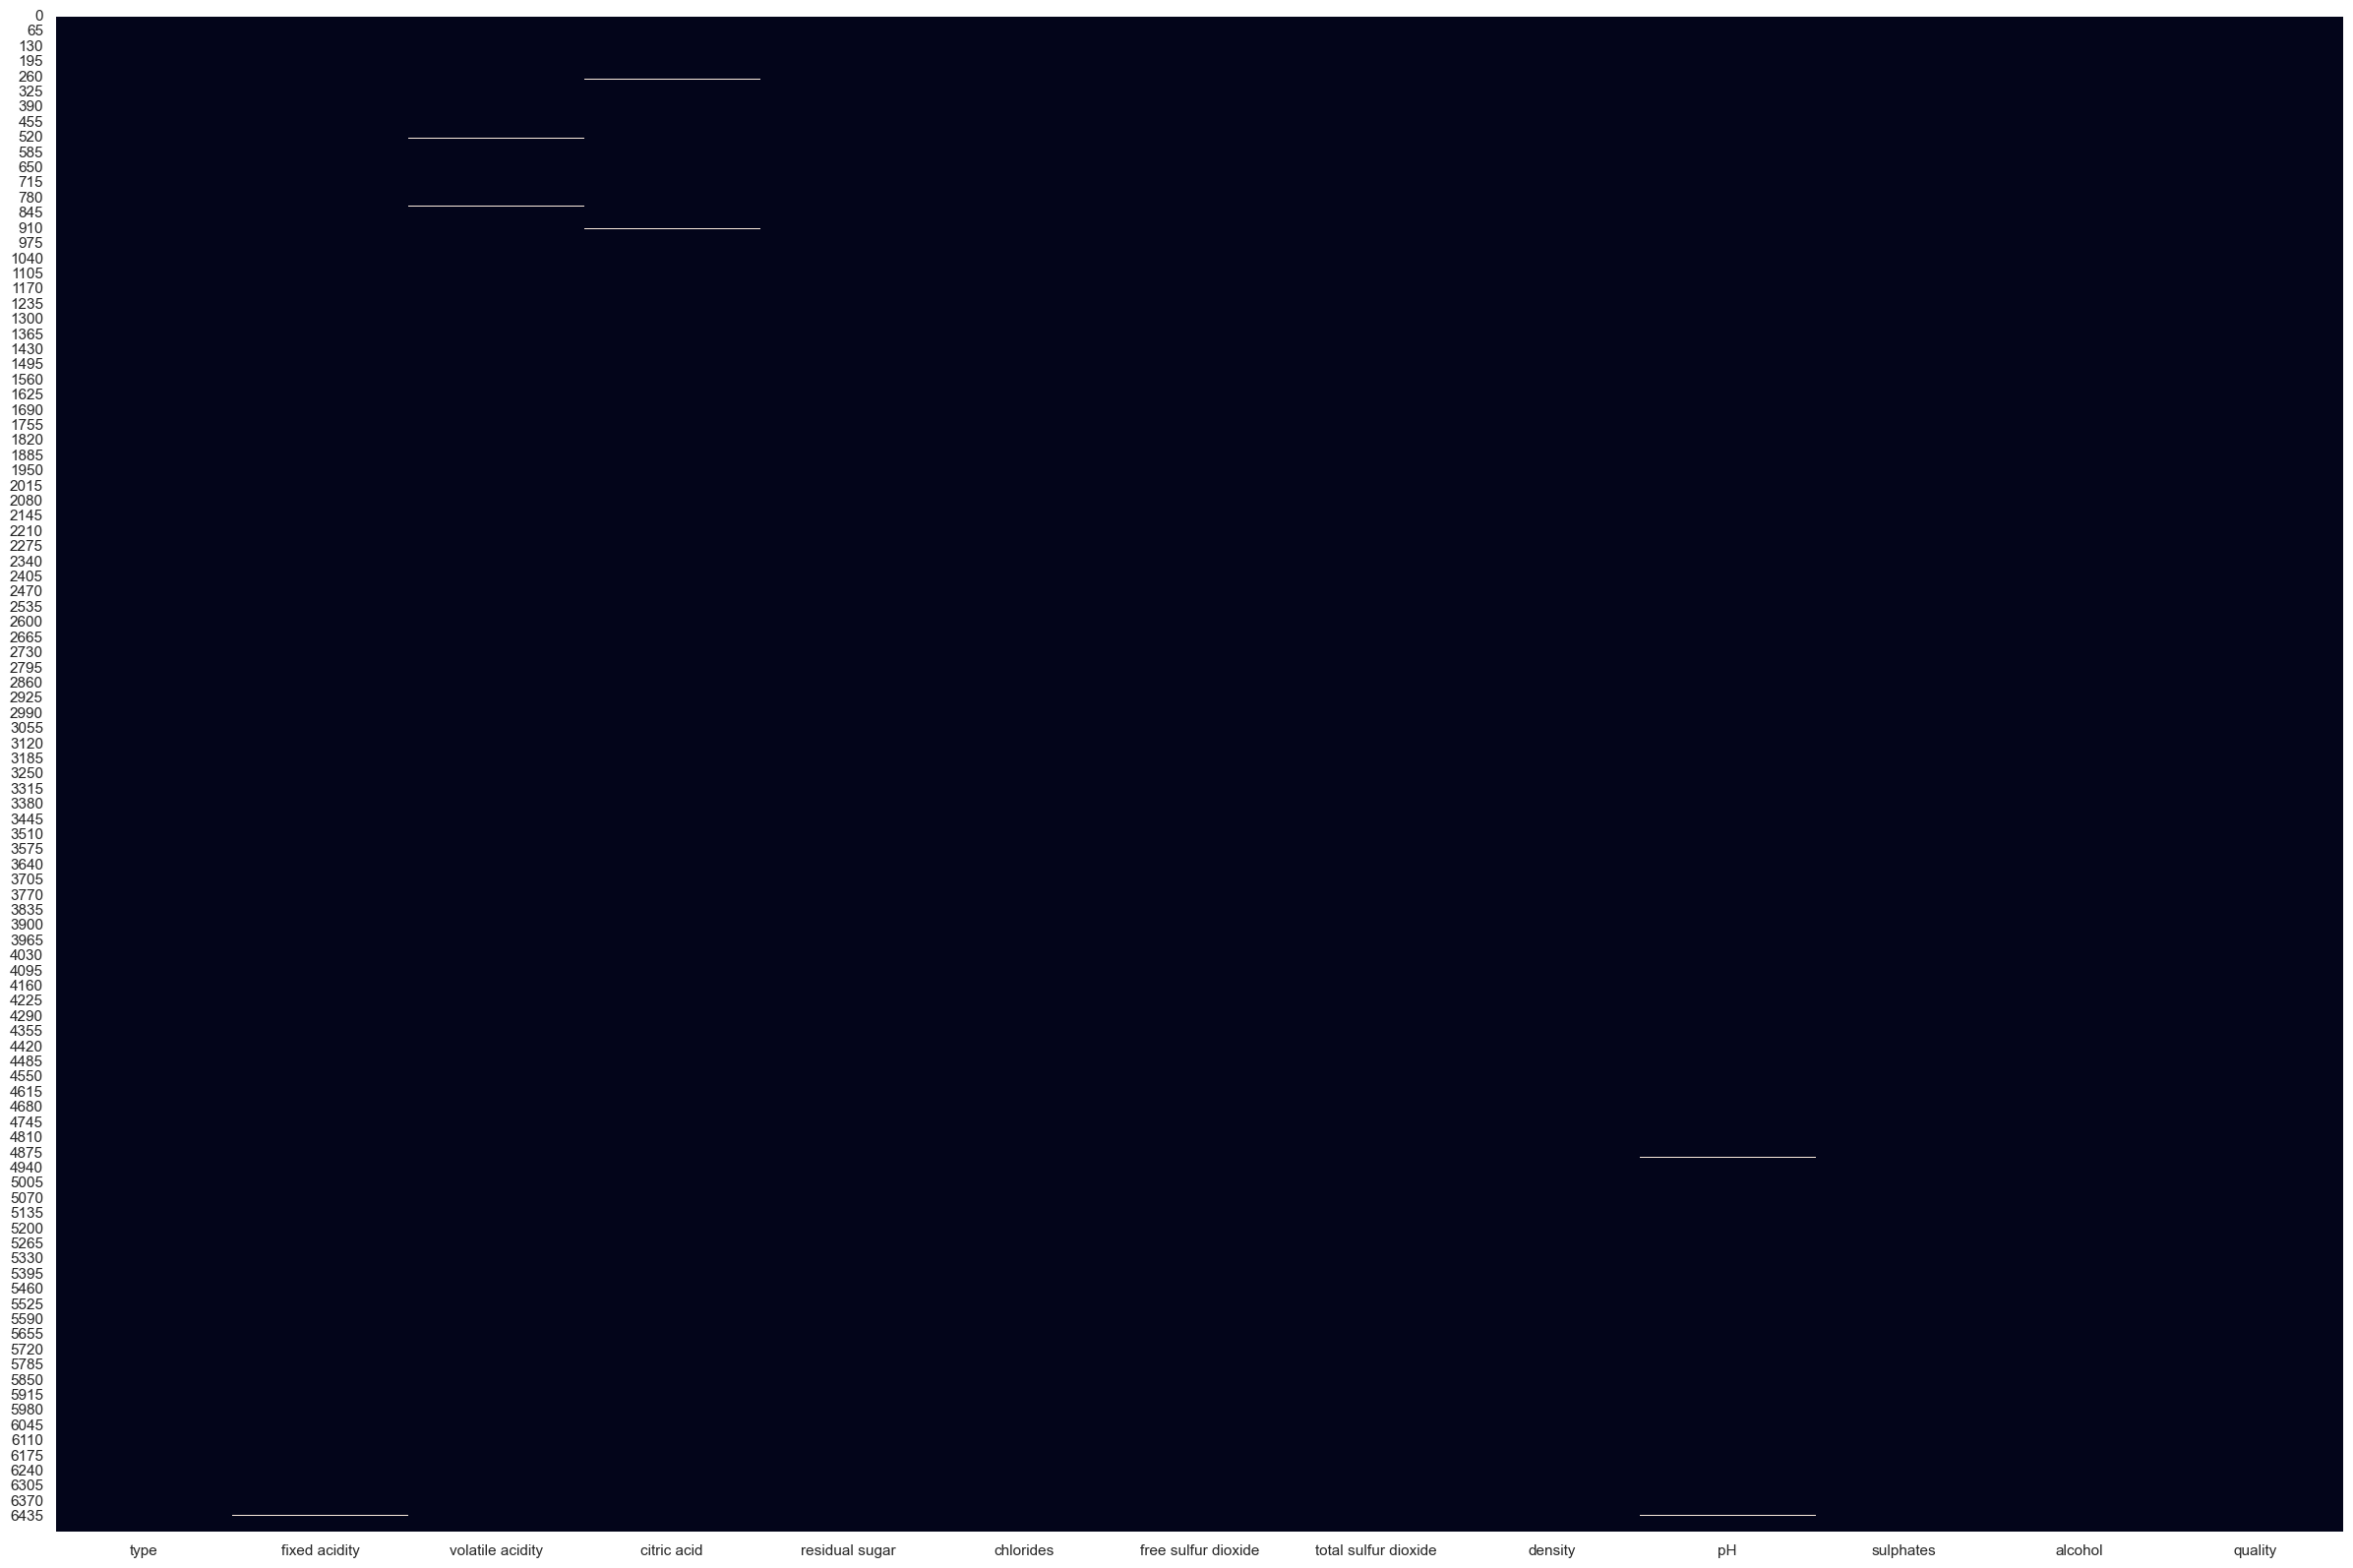

In [23]:
#Plotting the missing values on a heatmap
plt.figure(figsize=(30,20))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [24]:
#Dealing with missing values
df_miss=df[["residual sugar","chlorides","citric acid","sulphates","volatile acidity","pH","fixed acidity"]]
df_old=df
#We will use mean to fill the NAs
for cols in df_miss.columns:
    df[cols]=df[cols].fillna(df[cols].mean())
df.isna().sum()
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

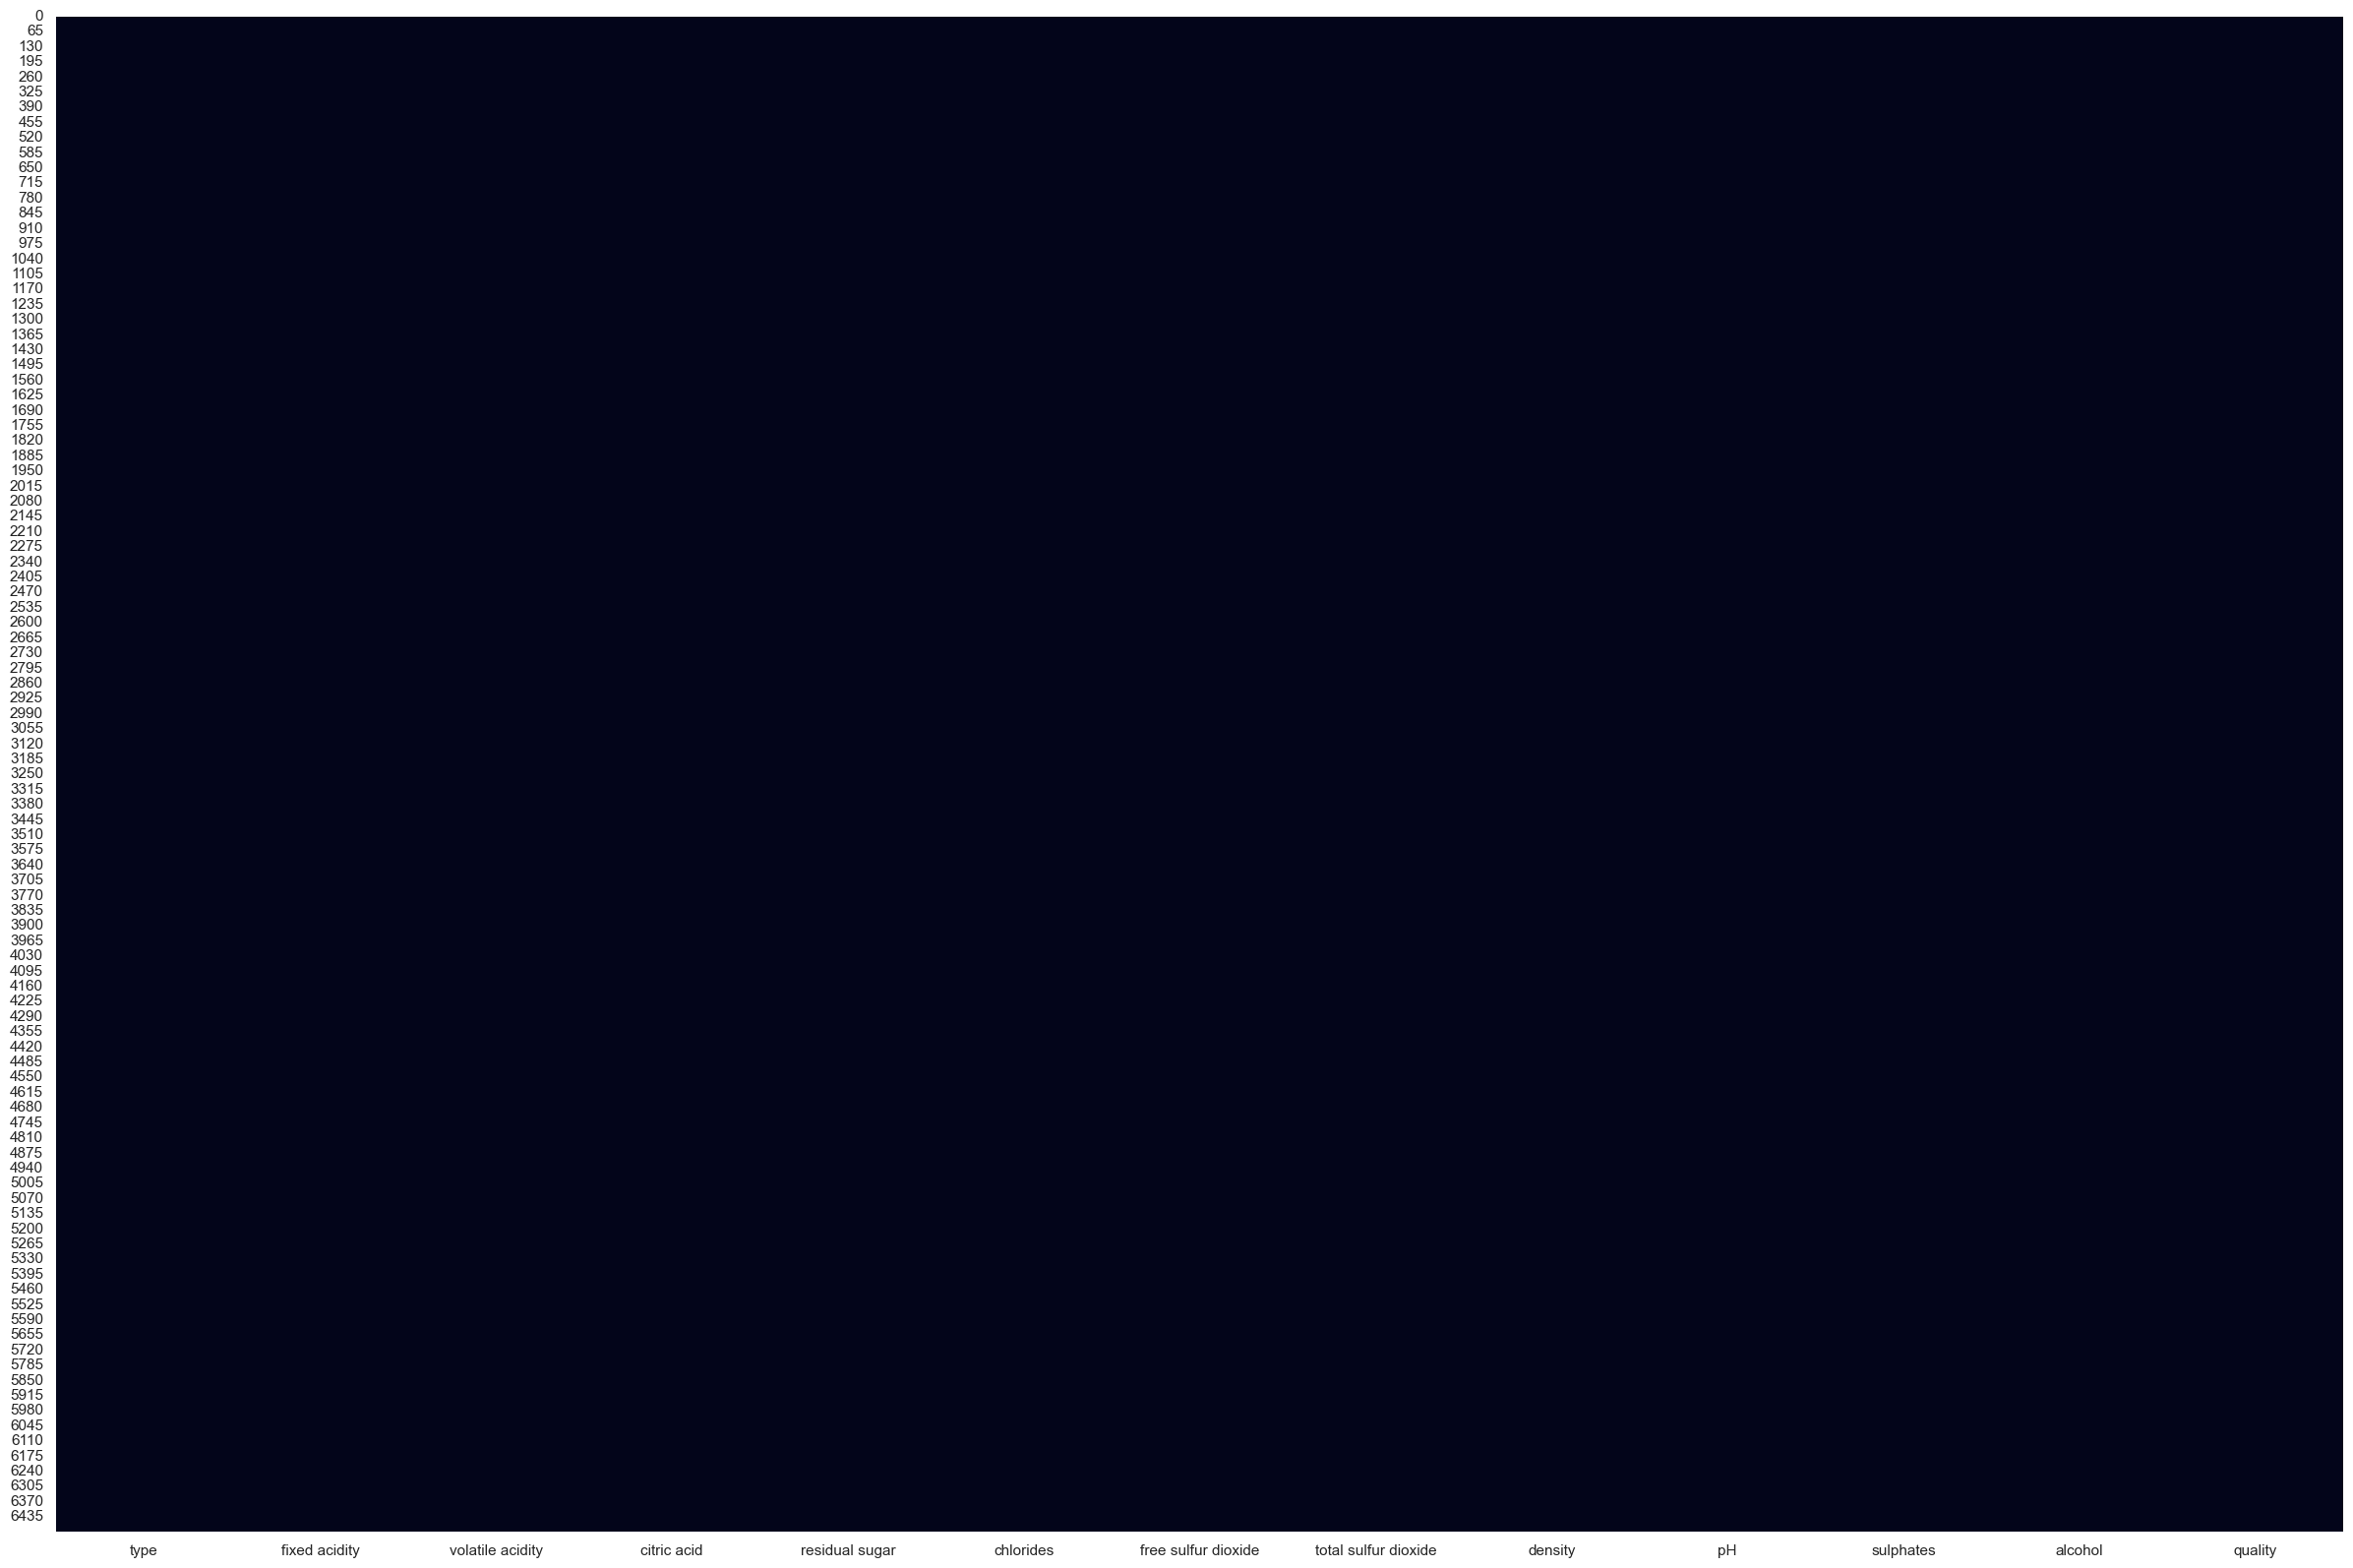

In [25]:
#Checking again
plt.figure(figsize=(30,20))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [26]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.295751          0.164548     0.145231        4.757392   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035031            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160637     0.148768     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [27]:
df.describe(include = object)

type
count    6497
unique      2
top     white
freq     4898

In [28]:
duplicate = df.duplicated().sum()
print(duplicate,":duplicate rows")

1168 :duplicate rows


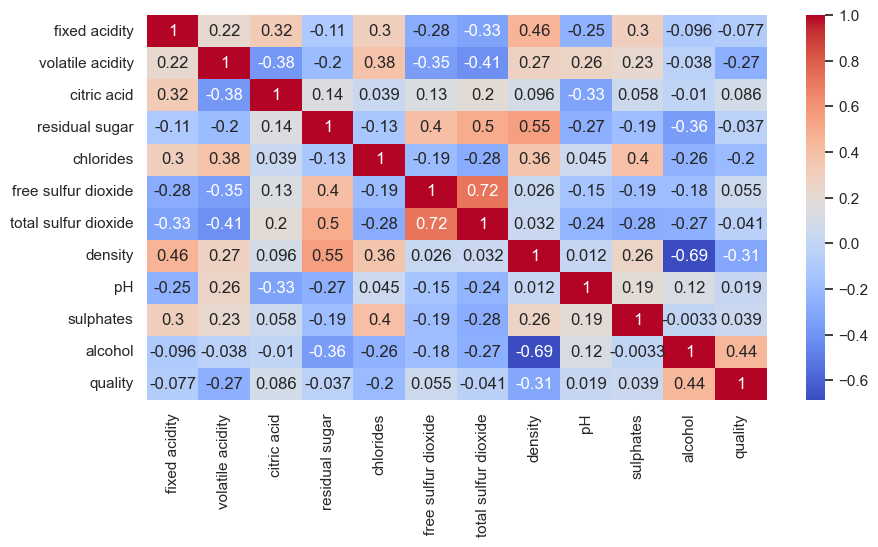

In [29]:
#Finding the correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

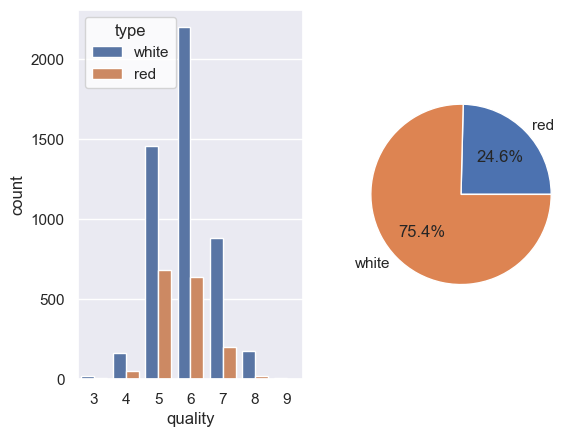

In [30]:
#Analyzing variables
fig,axes=plt.subplots(1,2)
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x="quality", hue="type",ax=axes[0])
df_count=df.groupby("type")["quality"].count()
plt.pie(x=df_count,autopct='%.1f%%',labels=['red','white'])
plt.show()

In [31]:
df_old_3=df
df_old_3.head(15)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   white            7.0              0.27         0.36           20.70   
1   white            6.3              0.30         0.34            1.60   
2   white            8.1              0.28         0.40            6.90   
3   white            7.2              0.23         0.32            8.50   
4   white            7.2              0.23         0.32            8.50   
5   white            8.1              0.28         0.40            6.90   
6   white            6.2              0.32         0.16            7.00   
7   white            7.0              0.27         0.36           20.70   
8   white            6.3              0.30         0.34            1.60   
9   white            8.1              0.22         0.43            1.50   
10  white            8.1              0.27         0.41            1.45   
11  white            8.6              0.23         0.40            4.20   
12  white            7.9              0.18         0.37            1.20   
13  white            6.6              0.16         0.40            1.50   
14  white            8.3              0.42         0.62           19.25   

    chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0       0.045                 45.0                 170.0   1.0010  3.00   
1       0.049                 14.0                 132.0   0.9940  3.30   
2       0.050                 30.0                  97.0   0.9951  3.26   
3       0.058                 47.0                 186.0   0.9956  3.19   
4       0.058                 47.0                 186.0   0.9956  3.19   
5       0.050                 30.0                  97.0   0.9951  3.26   
6       0.045                 30.0                 136.0   0.9949  3.18   
7       0.045                 45.0                 170.0   1.0010  3.00   
8       0.049                 14.0                 132.0   0.9940  3.30   
9       0.044                 28.0                 129.0   0.9938  3.22   
10      0.033                 11.0                  63.0   0.9908  2.99   
11      0.035                 17.0                 109.0   0.9947  3.14   
12      0.040                 16.0                  75.0   0.9920  3.18   
13      0.044                 48.0                 143.0   0.9912  3.54   
14      0.040                 41.0                 172.0   1.0002  2.98   

    sulphates  alcohol  quality  
0        0.45      8.8        6  
1        0.49      9.5        6  
2        0.44     10.1        6  
3        0.40      9.9        6  
4        0.40      9.9        6  
5        0.44     10.1        6  
6        0.47      9.6        6  
7        0.45      8.8        6  
8        0.49      9.5        6  
9        0.45     11.0        6  
10       0.56     12.0        5  
11       0.53      9.7        5  
12       0.63     10.8        5  
13       0.52     12.4        7  
14       0.67      9.7        5

In [32]:
df.head(20)
df.describe()
df_temp=df

In [33]:
quaity_mapping = { 3 : "Low",4 : "Low",5: "Low",6 : "High",7: "High",8 : "High",9 : "High"}
df_temp["quality"] =  df_temp["quality"].map(quaity_mapping)

In [34]:
df_temp.head(30)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   white       7.000000              0.27         0.36           20.70   
1   white       6.300000              0.30         0.34            1.60   
2   white       8.100000              0.28         0.40            6.90   
3   white       7.200000              0.23         0.32            8.50   
4   white       7.200000              0.23         0.32            8.50   
5   white       8.100000              0.28         0.40            6.90   
6   white       6.200000              0.32         0.16            7.00   
7   white       7.000000              0.27         0.36           20.70   
8   white       6.300000              0.30         0.34            1.60   
9   white       8.100000              0.22         0.43            1.50   
10  white       8.100000              0.27         0.41            1.45   
11  white       8.600000              0.23         0.40            4.20   
12  white       7.900000              0.18         0.37            1.20   
13  white       6.600000              0.16         0.40            1.50   
14  white       8.300000              0.42         0.62           19.25   
15  white       6.600000              0.17         0.38            1.50   
16  white       6.300000              0.48         0.04            1.10   
17  white       7.216579              0.66         0.48            1.20   
18  white       7.400000              0.34         0.42            1.10   
19  white       6.500000              0.31         0.14            7.50   
20  white       6.200000              0.66         0.48            1.20   
21  white       6.400000              0.31         0.38            2.90   
22  white       6.800000              0.26         0.42            1.70   
23  white       7.600000              0.67         0.14            1.50   
24  white       6.600000              0.27         0.41            1.30   
25  white       7.000000              0.25         0.32            9.00   
26  white       6.900000              0.24         0.35            1.00   
27  white       7.000000              0.28         0.39            8.70   
28  white       7.400000              0.27         0.48            1.10   
29  white       7.200000              0.32         0.36            2.00   

    chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0       0.045                 45.0                 170.0   1.0010  3.00   
1       0.049                 14.0                 132.0   0.9940  3.30   
2       0.050                 30.0                  97.0   0.9951  3.26   
3       0.058                 47.0                 186.0   0.9956  3.19   
4       0.058                 47.0                 186.0   0.9956  3.19   
5       0.050                 30.0                  97.0   0.9951  3.26   
6       0.045                 30.0                 136.0   0.9949  3.18   
7       0.045                 45.0                 170.0   1.0010  3.00   
8       0.049                 14.0                 132.0   0.9940  3.30   
9       0.044                 28.0                 129.0   0.9938  3.22   
10      0.033                 11.0                  63.0   0.9908  2.99   
11      0.035                 17.0                 109.0   0.9947  3.14   
12      0.040                 16.0                  75.0   0.9920  3.18   
13      0.044                 48.0                 143.0   0.9912  3.54   
14      0.040                 41.0                 172.0   1.0002  2.98   
15      0.032                 28.0                 112.0   0.9914  3.25   
16      0.046                 30.0                  99.0   0.9928  3.24   
17      0.029                 29.0                  75.0   0.9892  3.33   
18      0.033                 17.0                 171.0   0.9917  3.12   
19      0.044                 34.0                 133.0   0.9955  3.22   
20      0.029                 29.0                  75.0   0.9892  3.33   
21      0.038                

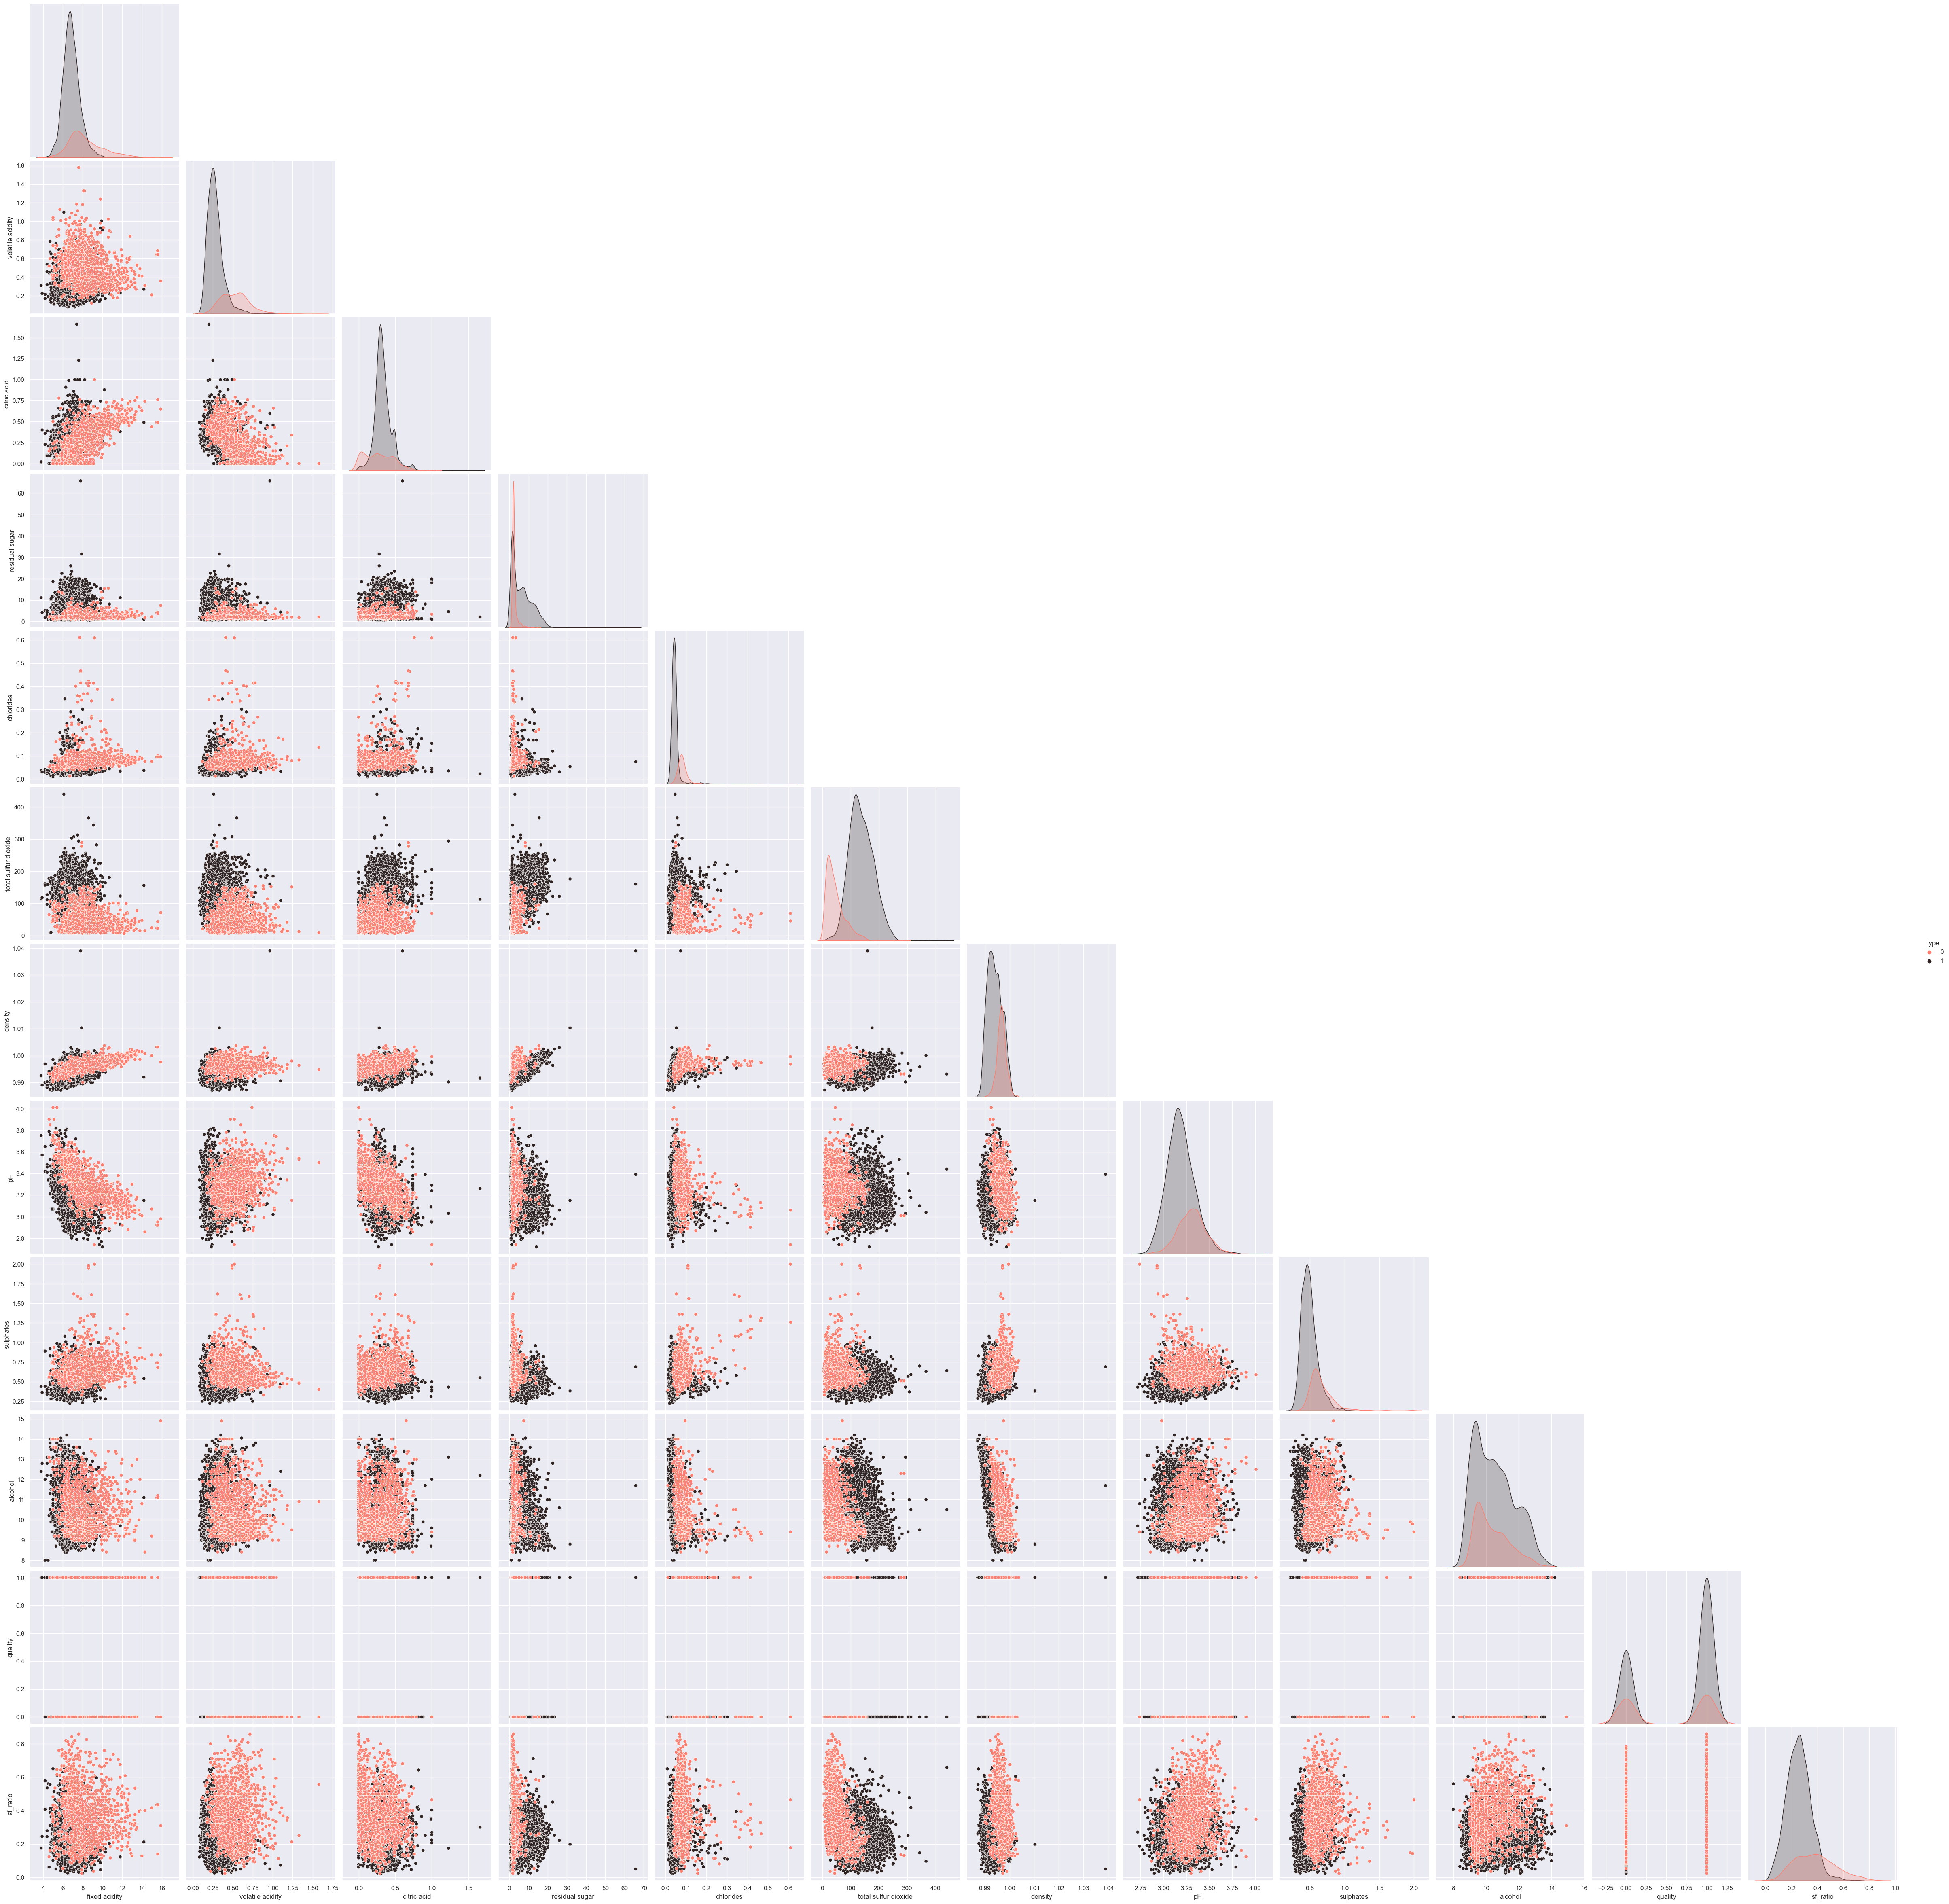

In [51]:
sns_plot = sns.pairplot(df_temp,corner=True,hue='type',palette='dark:salmon_r',height=4.0)
plt.show()

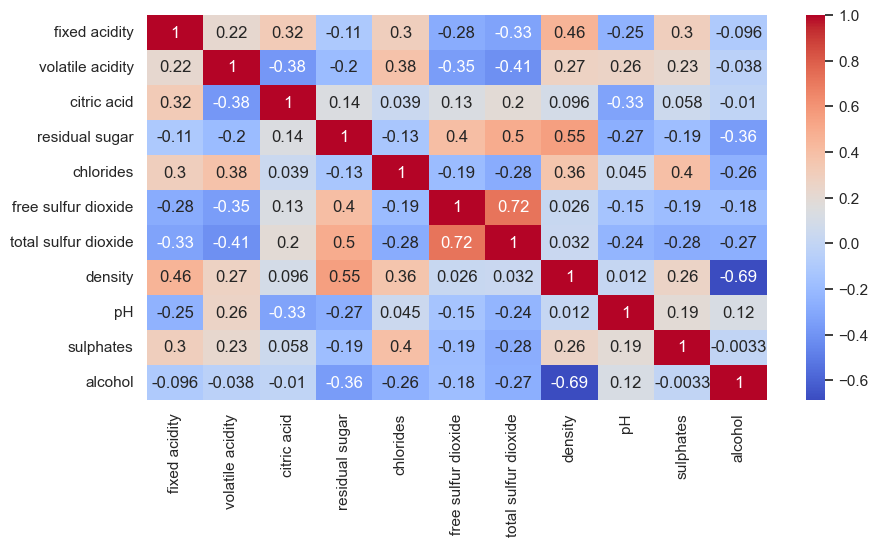

In [35]:
#Finding the correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(df_temp.corr(),cmap='coolwarm',annot=True)
plt.show()

In [36]:
#free sulfer dioxide is a part of the total sulfur dioxide
df_temp_1=df_temp
df_temp['sf_ratio']=df['free sulfur dioxide']/df['total sulfur dioxide']
df_temp.drop(['free sulfur dioxide'],axis=1,inplace=True)
df_temp.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  total sulfur dioxide  density    pH  sulphates  alcohol quality  \
0      0.045                 170.0   1.0010  3.00       0.45      8.8    High   
1      0.049                 132.0   0.9940  3.30       0.49      9.5    High   
2      0.050                  97.0   0.9951  3.26       0.44     10.1    High   
3      0.058                 186.0   0.9956  3.19       0.40      9.9    High   
4      0.058                 186.0   0.9956  3.19       0.40      9.9    High   

   sf_ratio  
0  0.264706  
1  0.106061  
2  0.309278  
3  0.252688  
4  0.252688

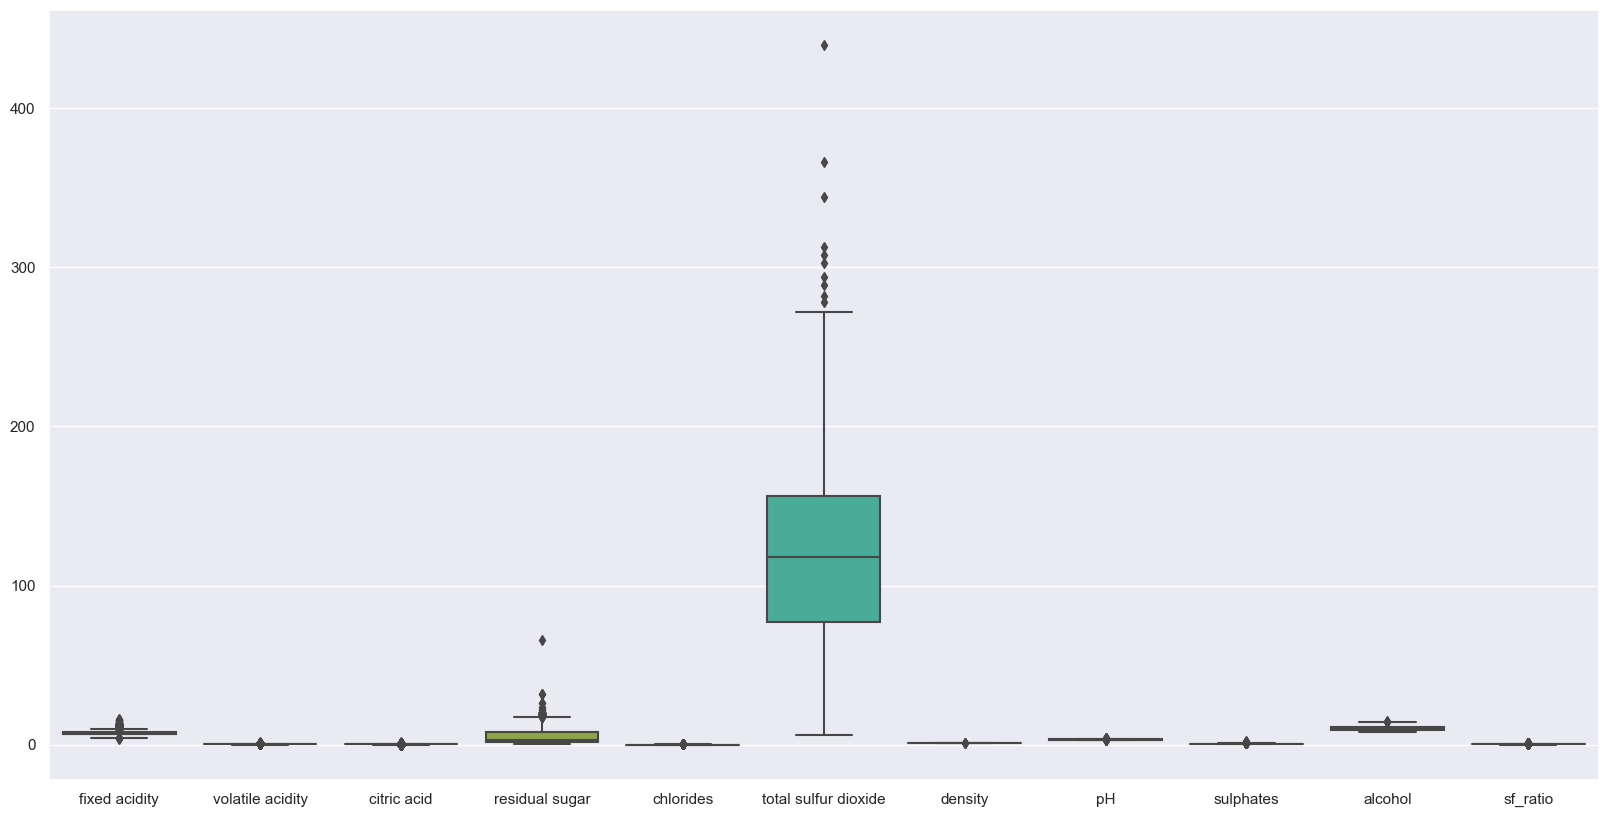

In [37]:
#Let's have a look at the outliers
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=df_temp)
plt.show()

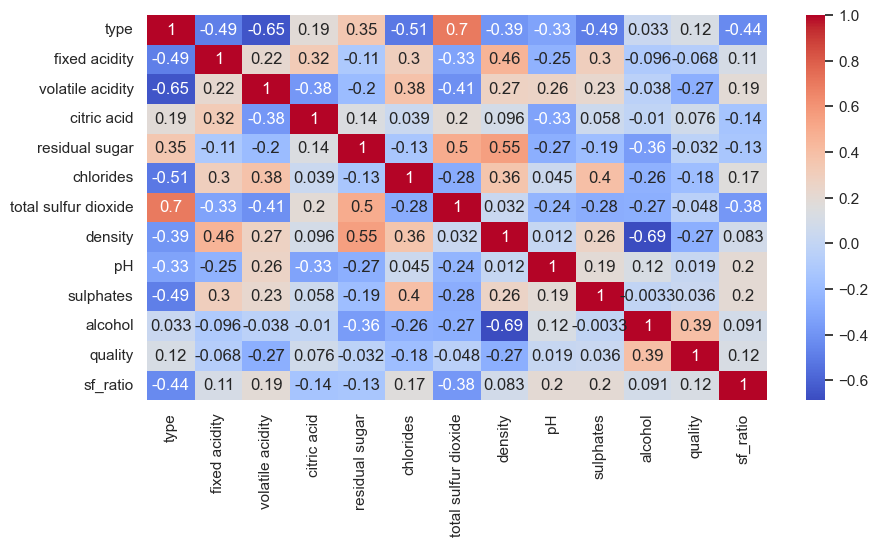

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(df_temp.corr(),cmap='coolwarm',annot=True)
plt.show()

In [38]:
df_temp['type']=pd.get_dummies(df_temp['type'],drop_first=True)
quaity_mapping = {"Low":0, "High":1}
df_temp["quality"] =  df_temp["quality"].map(quaity_mapping)
df_temp.head(20)


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      1       7.000000              0.27         0.36           20.70   
1      1       6.300000              0.30         0.34            1.60   
2      1       8.100000              0.28         0.40            6.90   
3      1       7.200000              0.23         0.32            8.50   
4      1       7.200000              0.23         0.32            8.50   
5      1       8.100000              0.28         0.40            6.90   
6      1       6.200000              0.32         0.16            7.00   
7      1       7.000000              0.27         0.36           20.70   
8      1       6.300000              0.30         0.34            1.60   
9      1       8.100000              0.22         0.43            1.50   
10     1       8.100000              0.27         0.41            1.45   
11     1       8.600000              0.23         0.40            4.20   
12     1       7.900000              0.18         0.37            1.20   
13     1       6.600000              0.16         0.40            1.50   
14     1       8.300000              0.42         0.62           19.25   
15     1       6.600000              0.17         0.38            1.50   
16     1       6.300000              0.48         0.04            1.10   
17     1       7.216579              0.66         0.48            1.20   
18     1       7.400000              0.34         0.42            1.10   
19     1       6.500000              0.31         0.14            7.50   

    chlorides  total sulfur dioxide  density    pH  sulphates  alcohol  \
0       0.045                 170.0   1.0010  3.00       0.45      8.8   
1       0.049                 132.0   0.9940  3.30       0.49      9.5   
2       0.050                  97.0   0.9951  3.26       0.44     10.1   
3       0.058                 186.0   0.9956  3.19       0.40      9.9   
4       0.058                 186.0   0.9956  3.19       0.40      9.9   
5       0.050                  97.0   0.9951  3.26       0.44     10.1   
6       0.045                 136.0   0.9949  3.18       0.47      9.6   
7       0.045                 170.0   1.0010  3.00       0.45      8.8   
8       0.049                 132.0   0.9940  3.30       0.49      9.5   
9       0.044                 129.0   0.9938  3.22       0.45     11.0   
10      0.033                  63.0   0.9908  2.99       0.56     12.0   
11      0.035                 109.0   0.9947  3.14       0.53      9.7   
12      0.040                  75.0   0.9920  3.18       0.63     10.8   
13      0.044                 143.0   0.9912  3.54       0.52     12.4   
14      0.040                 172.0   1.0002  2.98       0.67      9.7   
15      0.032                 112.0   0.9914  3.25       0.55     11.4   
16      0.046                  99.0   0.9928  3.24       0.36      9.6   
17      0.029                  75.0   0.9892  3.33       0.39     12.8   
18      0.033                 171.0   0.9917  3.12       0.53     11.3   
19      0.044                 133.0   0.9955  3.22       0.50      9.5   

    quality  sf_ratio  
0         1  0.264706  
1         1  0.106061  
2         1  0.309278  
3         1  0.252688  
4         1  0.252688  
5         1  0.309278  
6         1  0.220588  
7         1  0.264706  
8         1  0.106061  
9         1  0.217054  
10        0  0.174603  
11        0  0.155963  
12        0  0.213333  
13        1  0.335664  
14        0  0.238372  
15        1  0.250000  
16        1  0.303030  
17        1  0.386667  
18        1  0.099415  
19        0  0.255639

[Text(0.5, 1.0, 'Quality v/s Alcohol')]

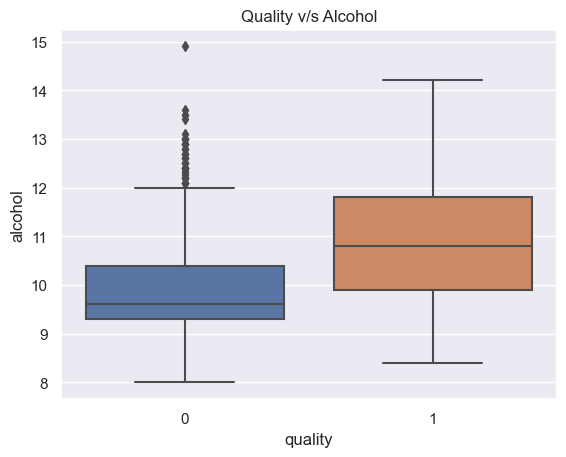

In [40]:
sns.boxplot(data=df_temp, x="quality", y ="alcohol").set(title='Quality v/s Alcohol')

In [39]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   uint8  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  sf_ratio              6497 non-null   float64
dtypes: float64(11), int64(1), uint8(1)
memory usage: 615.6 KB


In [79]:
df_temp.dtypes

type                      uint8
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
sf_ratio                float64
dtype: object

In [54]:
df_num_features=df_temp.drop(['type','quality'],axis=1)
for col in df_num_features.columns:
    print("Column ", col, " :", shapiro(df_num_features[col]))

Column  fixed acidity  : ShapiroResult(statistic=0.8797012567520142, pvalue=0.0)
Column  volatile acidity  : ShapiroResult(statistic=0.8758564591407776, pvalue=0.0)
Column  citric acid  : ShapiroResult(statistic=0.9649235010147095, pvalue=4.999661625986668e-37)
Column  residual sugar  : ShapiroResult(statistic=0.8248178958892822, pvalue=0.0)
Column  chlorides  : ShapiroResult(statistic=0.6182848811149597, pvalue=0.0)
Column  total sulfur dioxide  : ShapiroResult(statistic=0.9825838208198547, pvalue=1.5920966626574383e-27)
Column  density  : ShapiroResult(statistic=0.9682108163833618, pvalue=1.330269304272158e-35)
Column  pH  : ShapiroResult(statistic=0.9914466142654419, pvalue=2.197733584552725e-19)
Column  sulphates  : ShapiroResult(statistic=0.8988358378410339, pvalue=0.0)
Column  alcohol  : ShapiroResult(statistic=0.9535516500473022, pvalue=2.9630456028148257e-41)
Column  sf_ratio  : ShapiroResult(statistic=0.9525539875030518, pvalue=1.3871453498351364e-41)


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [96]:
df_temp_2=df_temp
#Standardising the data to bring the entire data on the same scale. Standardising will help us in improving our accuracy
df_temp_3=df_temp_2.drop(['type','quality'],axis=1)
df_temp_3.head()
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
ms_fit=ms.fit(df_temp_3)
new_df=pd.DataFrame(ms.fit_transform(df_temp_3), columns = df_temp_3.columns)

In [97]:
new_df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.264463          0.126667     0.216867        0.308282   0.059801   
1       0.206612          0.146667     0.204819        0.015337   0.066445   
2       0.355372          0.133333     0.240964        0.096626   0.068106   
3       0.280992          0.100000     0.192771        0.121166   0.081395   
4       0.280992          0.100000     0.192771        0.121166   0.081395   
5       0.355372          0.133333     0.240964        0.096626   0.068106   
6       0.198347          0.160000     0.096386        0.098160   0.059801   
7       0.264463          0.126667     0.216867        0.308282   0.059801   
8       0.206612          0.146667     0.204819        0.015337   0.066445   
9       0.355372          0.093333     0.259036        0.013804   0.058140   

   total sulfur dioxide   density        pH  sulphates   alcohol  sf_ratio  
0              0.377880  0.267785  0.217054   0.129213  0.115942  0.289998  
1              0.290323  0.132832  0.449612   0.151685  0.217391  0.099870  
2              0.209677  0.154039  0.418605   0.123596  0.304348  0.343415  
3              0.414747  0.163678  0.364341   0.101124  0.275362  0.275595  
4              0.414747  0.163678  0.364341   0.101124  0.275362  0.275595  
5              0.209677  0.154039  0.418605   0.123596  0.304348  0.343415  
6              0.299539  0.150183  0.356589   0.140449  0.231884  0.237125  
7              0.377880  0.267785  0.217054   0.129213  0.115942  0.289998  
8              0.290323  0.132832  0.449612   0.151685  0.217391  0.099870  
9              0.283410  0.128976  0.387597   0.129213  0.434783  0.232890

In [98]:
type_qals=df_temp_2[['type','quality']]
new_df=pd.concat([new_df, type_qals], axis = 1)
new_df.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        0.264463          0.126667     0.216867        0.308282   0.059801   
1        0.206612          0.146667     0.204819        0.015337   0.066445   
2        0.355372          0.133333     0.240964        0.096626   0.068106   
3        0.280992          0.100000     0.192771        0.121166   0.081395   
4        0.280992          0.100000     0.192771        0.121166   0.081395   
5        0.355372          0.133333     0.240964        0.096626   0.068106   
6        0.198347          0.160000     0.096386        0.098160   0.059801   
7        0.264463          0.126667     0.216867        0.308282   0.059801   
8        0.206612          0.146667     0.204819        0.015337   0.066445   
9        0.355372          0.093333     0.259036        0.013804   0.058140   
10       0.355372          0.126667     0.246988        0.013037   0.039867   
11       0.396694          0.100000     0.240964        0.055215   0.043189   
12       0.338843          0.066667     0.222892        0.009202   0.051495   
13       0.231405          0.053333     0.240964        0.013804   0.058140   
14       0.371901          0.226667     0.373494        0.286043   0.051495   
15       0.231405          0.060000     0.228916        0.013804   0.038206   
16       0.206612          0.266667     0.024096        0.007669   0.061462   
17       0.282362          0.386667     0.289157        0.009202   0.033223   
18       0.297521          0.173333     0.253012        0.007669   0.039867   
19       0.223140          0.153333     0.084337        0.105828   0.058140   

    total sulfur dioxide   density        pH  sulphates   alcohol  sf_ratio  \
0               0.377880  0.267785  0.217054   0.129213  0.115942  0.289998   
1               0.290323  0.132832  0.449612   0.151685  0.217391  0.099870   
2               0.209677  0.154039  0.418605   0.123596  0.304348  0.343415   
3               0.414747  0.163678  0.364341   0.101124  0.275362  0.275595   
4               0.414747  0.163678  0.364341   0.101124  0.275362  0.275595   
5               0.209677  0.154039  0.418605   0.123596  0.304348  0.343415   
6               0.299539  0.150183  0.356589   0.140449  0.231884  0.237125   
7               0.377880  0.267785  0.217054   0.129213  0.115942  0.289998   
8               0.290323  0.132832  0.449612   0.151685  0.217391  0.099870   
9               0.283410  0.128976  0.387597   0.129213  0.434783  0.232890   
10              0.131336  0.071139  0.209302   0.191011  0.579710  0.182015   
11              0.237327  0.146327  0.325581   0.174157  0.246377  0.159676   
12              0.158986  0.094274  0.356589   0.230337  0.405797  0.228431   
13              0.315668  0.078851  0.635659   0.168539  0.637681  0.375037   
14              0.382488  0.252362  0.201550   0.252809  0.246377  0.258438   
15              0.244240  0.082707  0.410853   0.185393  0.492754  0.272374   
16              0.214286  0.109697  0.403101   0.078652  0.231884  0.335927   
17              0.158986  0.040293  0.472868   0.095506  0.695652  0.436161   
18              0.380184  0.088490  0.310078   0.174157  0.478261  0.091906   
19              0.292627  0.161751  0.387597   0.157303  0.217391  0.279132   

    type  quality  
0      1        1  
1      1        1  
2      1        1  
3      1        1  
4      1        1  
5      1        1  
6      1        1  
7      1        1  
8      1        1  
9      1        1  
10     1        0  
11     1        0  
12     1        0  
13     1        1  
14     1        0  
15     1        1  
16     1        1  
17     1        1  
18     1        1  
19     1        0

In [101]:
new_df.head(15)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        0.264463          0.126667     0.216867        0.308282   0.059801   
1        0.206612          0.146667     0.204819        0.015337   0.066445   
2        0.355372          0.133333     0.240964        0.096626   0.068106   
3        0.280992          0.100000     0.192771        0.121166   0.081395   
4        0.280992          0.100000     0.192771        0.121166   0.081395   
5        0.355372          0.133333     0.240964        0.096626   0.068106   
6        0.198347          0.160000     0.096386        0.098160   0.059801   
7        0.264463          0.126667     0.216867        0.308282   0.059801   
8        0.206612          0.146667     0.204819        0.015337   0.066445   
9        0.355372          0.093333     0.259036        0.013804   0.058140   
10       0.355372          0.126667     0.246988        0.013037   0.039867   
11       0.396694          0.100000     0.240964        0.055215   0.043189   
12       0.338843          0.066667     0.222892        0.009202   0.051495   
13       0.231405          0.053333     0.240964        0.013804   0.058140   
14       0.371901          0.226667     0.373494        0.286043   0.051495   

    total sulfur dioxide   density        pH  sulphates   alcohol  sf_ratio  \
0               0.377880  0.267785  0.217054   0.129213  0.115942  0.289998   
1               0.290323  0.132832  0.449612   0.151685  0.217391  0.099870   
2               0.209677  0.154039  0.418605   0.123596  0.304348  0.343415   
3               0.414747  0.163678  0.364341   0.101124  0.275362  0.275595   
4               0.414747  0.163678  0.364341   0.101124  0.275362  0.275595   
5               0.209677  0.154039  0.418605   0.123596  0.304348  0.343415   
6               0.299539  0.150183  0.356589   0.140449  0.231884  0.237125   
7               0.377880  0.267785  0.217054   0.129213  0.115942  0.289998   
8               0.290323  0.132832  0.449612   0.151685  0.217391  0.099870   
9               0.283410  0.128976  0.387597   0.129213  0.434783  0.232890   
10              0.131336  0.071139  0.209302   0.191011  0.579710  0.182015   
11              0.237327  0.146327  0.325581   0.174157  0.246377  0.159676   
12              0.158986  0.094274  0.356589   0.230337  0.405797  0.228431   
13              0.315668  0.078851  0.635659   0.168539  0.637681  0.375037   
14              0.382488  0.252362  0.201550   0.252809  0.246377  0.258438   

    type  quality  
0      1        1  
1      1        1  
2      1        1  
3      1        1  
4      1        1  
5      1        1  
6      1        1  
7      1        1  
8      1        1  
9      1        1  
10     1        0  
11     1        0  
12     1        0  
13     1        1  
14     1        0

In [102]:
new_df_1=new_df
new_df_1.to_csv("wineQuality_processed.csv",index=False)